<h2>Importing libraries</h2>

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('wordnet')
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Word predictor/abcnews.csv')

In [234]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


<h3> Randomly Sampling 150000 datapoints from the dataframe

Note:- I am using google colab with 12gb of ram ,it can't load the complete dataset for categorical conversion,so I need to take a sample of data

In [235]:
df=df.sample(n=17000)

In [236]:
df.head(3)

,publish_date,headline_text
368457,20080307,google pulls map images at pentagons request
182136,20050815,indian call centres sell off australians details
734134,20121022,child sexual abuse inquiry continues


In [237]:
df.shape

(17000, 2)

In [238]:
#Resetting the index
df.reset_index(inplace=True)

In [239]:
#Dropping the old index
df.drop(columns=['index'],inplace=True)

<h2>Converting the date in proper format</h2>

In [240]:
df['publish_date']=pd.to_datetime(df['publish_date'],format='%Y%m%d')

In [241]:
df.head()

,publish_date,headline_text
0,2008-03-07,google pulls map images at pentagons request
1,2005-08-15,indian call centres sell off australians details
2,2012-10-22,child sexual abuse inquiry continues
3,2004-01-11,us claims russia sold arms to pre war iraq
4,2017-12-15,abc news quiz: boxing; birds and birthdays


In [242]:
df.shape

(17000, 2)

<h2> Visualizing the text</h2>

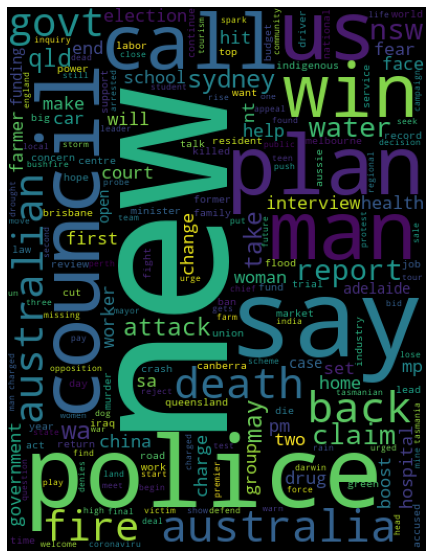

In [243]:
#Visualizing the Most repeating words
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
Cloud_img=WordCloud(background_color='black',height=520,width=400).generate(' '.join(df['headline_text']))
plt.imshow(Cloud_img)
plt.axis('off')
plt.show()

<h2>Preprocessing the text<h2>

In [244]:
#Preprocessing the text
def cleaning(text):
  clean_list=[]
  wl=WordNetLemmatizer()
  #Tokenizing the words
  word_tokens=re.split(' ',text)
  for i in word_tokens:
    #Removing the punctuations
    small=i.lower()
    punc_remov=re.sub('^a-zA-z',' ',small)
    if punc_remov not in sw:
      clean_list.append(wl.lemmatize(punc_remov))
  clean_text=' '.join(clean_list)
  return clean_text

In [245]:
#Cleaned headline
df['Cleaned_headline']=df['headline_text'].apply(cleaning)

In [246]:
df

,publish_date,headline_text,Cleaned_headline
0,2008-03-07,google pulls map images at pentagons request,google pull map image pentagon request
1,2005-08-15,indian call centres sell off australians details,indian call centre sell australian detail
2,2012-10-22,child sexual abuse inquiry continues,child sexual abuse inquiry continues
3,2004-01-11,us claims russia sold arms to pre war iraq,u claim russia sold arm pre war iraq
4,2017-12-15,abc news quiz: boxing; birds and birthdays,abc news quiz: boxing; bird birthday
...,...,...,...
16995,2006-06-05,teen remains critically injured after car crash,teen remains critically injured car crash
16996,2007-02-26,tourism award a win for whitsundays,tourism award win whitsunday
16997,2016-05-29,vincenzo nibali on brink of winning giro ditalia,vincenzo nibali brink winning giro ditalia
16998,2012-07-09,pearl producer was warned before dive death,pearl producer warned dive death


In [247]:
#Dropping the headline column
df.drop(columns=['headline_text','publish_date'],inplace=True)

In [248]:
#printing the 10 headlines
df['Cleaned_headline'][0:10]

0             google pull map image pentagon request
1          indian call centre sell australian detail
2               child sexual abuse inquiry continues
3               u claim russia sold arm pre war iraq
4               abc news quiz: boxing; bird birthday
5                  acquitted principal banned school
6                 woman avoids jail partner stabbing
7     four new mammography machine help fight breast
8    ecclestone admits f1 team could stop bahrain gp
9                    day two summary warrior v tiger
Name: Cleaned_headline, dtype: object

<h2>Visualizing the cleaned text</h2>

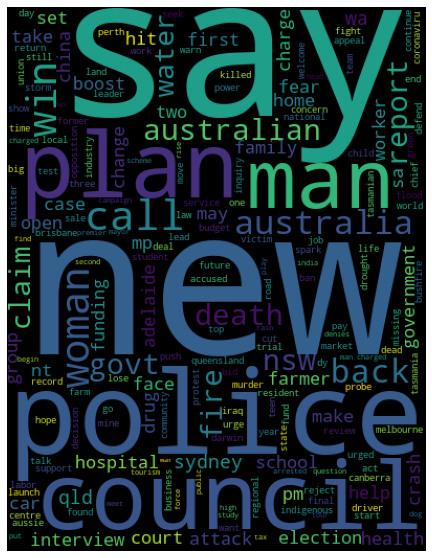

In [249]:
#Visualizing the Most repeating words
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
Cloud_img=WordCloud(background_color='black',height=520,width=400).generate(' '.join(df['Cleaned_headline']))
plt.imshow(Cloud_img)
plt.axis('off')
plt.show()

<h2>One hot encoding</h2>
Note :- We won't use this method because we also need to decode the text after prediction which is not possible while using this

In [250]:
# vocabulary=10000

In [251]:
# encoded_vec=[]
# for text in df['Cleaned_headline']:
#   encoded_vec.append(one_hot(text,n=vocabulary))

In [252]:
# print(f"one hot encoded vector{encoded_vec[0:10]}")

<h3>One hot encoding using tokenizer</h3>

In [253]:
#Creating an object of tokenizer
tokenizer_obj=Tokenizer()
#Fitting the tokenizer on the words present in headline column which will be used as vocabulary later
tokenizer_obj.fit_on_texts(df['Cleaned_headline'])


In [254]:
#One hot encoded diztionary
tokenizer_obj.word_index

{'police': 1,
 'man': 2,
 'new': 3,
 'say': 4,
 'u': 5,
 'council': 6,
 'govt': 7,
 'plan': 8,
 'court': 9,
 'australia': 10,
 'call': 11,
 'woman': 12,
 'death': 13,
 'interview': 14,
 'win': 15,
 'fire': 16,
 'australian': 17,
 'nsw': 18,
 'back': 19,
 'qld': 20,
 'crash': 21,
 'get': 22,
 'report': 23,
 'sydney': 24,
 'year': 25,
 'water': 26,
 'wa': 27,
 'attack': 28,
 'hit': 29,
 'claim': 30,
 'car': 31,
 'face': 32,
 'election': 33,
 'health': 34,
 'home': 35,
 'charged': 36,
 'change': 37,
 'market': 38,
 'take': 39,
 'sa': 40,
 'world': 41,
 'may': 42,
 'government': 43,
 'day': 44,
 'farmer': 45,
 'charge': 46,
 'hospital': 47,
 'child': 48,
 'set': 49,
 'two': 50,
 'national': 51,
 'murder': 52,
 'coast': 53,
 'open': 54,
 'found': 55,
 'school': 56,
 'first': 57,
 'driver': 58,
 'road': 59,
 'mp': 60,
 'rural': 61,
 'cut': 62,
 'fear': 63,
 'nt': 64,
 'china': 65,
 'drug': 66,
 'south': 67,
 'job': 68,
 'killed': 69,
 'group': 70,
 'centre': 71,
 'talk': 72,
 'queensland': 7

In [255]:
#Defining the vocab size
vocabulary_size=len(tokenizer_obj.word_index)
print(f'The vocabulary size is {vocabulary_size}')

The vocabulary size is 14882


In [256]:
#Encoding the headline
encoded_vec=[]
for text in df['Cleaned_headline']:
  encoded_vec.append(tokenizer_obj.texts_to_sequences([text])[0])

In [257]:
print(f"Encoded vector :- {encoded_vec[0]}")
print(f"Text :- {df['Cleaned_headline'][0]}")

Encoded vector :- [2645, 696, 1489, 1490, 4216, 2646]
Text :- google pull map image pentagon request


In [258]:
encoded_vec

[[2645, 696, 1489, 1490, 4216, 2646],
 [468, 11, 71, 1074, 17, 732],
 [48, 639, 275, 161, 330],
 [5, 30, 396, 1022, 1748, 2135, 169, 124],
 [121, 143, 1749, 2136, 697, 1290],
 [2371, 2137, 968, 56],
 [12, 1140, 185, 762, 365],
 [228, 3, 7414, 1750, 80, 139, 1931],
 [5272, 614, 1932, 200, 135, 339, 4217, 2138],
 [44, 50, 1603, 1023, 733, 314],
 [167, 95, 2139, 90, 125, 9],
 [121, 1141, 2140, 7415, 1378],
 [108, 6, 186, 1933, 5273, 3491],
 [5274, 505, 1604, 25],
 [3026, 7416, 5275, 1141],
 [3, 1075, 519, 916, 340, 763, 834, 487],
 [7417, 5276, 698, 166, 23],
 [2141, 19, 615, 585, 32, 4218],
 [2, 2371, 835],
 [322, 5277, 2372, 2373, 5, 1934, 305],
 [1291, 5278, 1935, 229, 64],
 [1076, 699, 193, 296, 872, 176],
 [2647, 662, 7418, 438, 3492],
 [1936, 663, 421, 1142, 1292],
 [1024, 3027, 229, 469, 616],
 [235, 640, 4219, 26, 873],
 [7419, 4, 2374, 4220, 240, 113, 439, 791, 11],
 [98, 1205, 28, 836, 136, 3493],
 [1, 323, 488, 700, 1751],
 [154, 969, 454, 2648],
 [1293, 4221, 1077, 7420],
 [52

<h2> Padding the one hot encoded vectors</h2>

In [259]:
#Adding pre padding to the one hot encoded vectors to make them same size as the maximum vector
#Getting the max length of the one hot encoded vector
max_len_vec=0
for values in encoded_vec:
  if len(values)>max_len_vec:
    max_len_vec=len(values)

In [260]:
print(f'max length of vector {max_len_vec}')

max length of vector 11


In [261]:
padded_vec=pad_sequences(encoded_vec,maxlen=max_len_vec,padding='pre')

In [262]:
print(f"The padded vector is :- {padded_vec}")

The padded vector is :- [[    0     0     0 ...  1490  4216  2646]
 [    0     0     0 ...  1074    17   732]
 [    0     0     0 ...   275   161   330]
 ...
 [    0     0     0 ...  1171  5169 14881]
 [    0     0     0 ...   467  2830    13]
 [    0     0     0 ...   766 14882    73]]


<h3>Creating the target variable</h3>

In [263]:
x=padded_vec[:,0:-1]
y=padded_vec[:,-1]

In [264]:
print(f'x={x}')
print(f'y={y}')

x=[[    0     0     0 ...  1489  1490  4216]
 [    0     0     0 ...    71  1074    17]
 [    0     0     0 ...   639   275   161]
 ...
 [    0     0     0 ...  7357  1171  5169]
 [    0     0     0 ...   812   467  2830]
 [    0     0     0 ...  3207   766 14882]]
y=[ 2646   732   330 ... 14881    13    73]


In [265]:
y_cat=to_categorical(y,num_classes=vocabulary_size)

<h3>Train Test Splitting</h3>

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.20,random_state=42)

In [267]:
print(f'X_train shape{x_train.shape}')
print(f'X_test shape{x_test.shape}')
print(f'y_train shape{y_train.shape}')
print(f'y_test shape{y_test.shape}')

X_train shape(13600, 10)
X_test shape(3400, 10)
y_train shape(13600, 14882)
y_test shape(3400, 14882)


<h3>Creating the model</h3>

In [279]:
model=keras.Sequential()
#Embedding layer
#input_dim is vocabulary_size + 1 because 0 is not considered when calculating vocab size
model.add(keras.layers.Embedding(input_dim=vocabulary_size+1,output_dim=20,input_length=max_len_vec-1,))#Bcz we have taken the last value as target label
model.add(keras.layers.LSTM(units=100))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=vocabulary_size,activation='softmax'))

In [280]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 10, 20)            297660    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               48400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 14882)             1503082   
Total params: 1,859,242
Trainable params: 1,859,242
Non-trainable params: 0
____________________________________________

In [281]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [282]:
model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
425/425 [==============================] - 6s 12ms/step - loss: 8.6920 - accuracy: 0.0055 - val_loss: 8.3996 - val_accuracy: 0.0065
Epoch 2/30
425/425 [==============================] - 4s 10ms/step - loss: 8.0232 - accuracy: 0.0060 - val_loss: 8.4695 - val_accuracy: 0.0053
Epoch 3/30
425/425 [==============================] - 4s 10ms/step - loss: 7.8404 - accuracy: 0.0063 - val_loss: 8.6154 - val_accuracy: 0.0053
Epoch 4/30
425/425 [==============================] - 4s 10ms/step - loss: 7.7180 - accuracy: 0.0063 - val_loss: 8.7373 - val_accuracy: 0.0053
Epoch 5/30
425/425 [==============================] - 4s 10ms/step - loss: 7.6214 - accuracy: 0.0062 - val_loss: 9.0079 - val_accuracy: 0.0053
Epoch 6/30
425/425 [==============================] - 4s 10ms/step - loss: 7.5318 - accuracy: 0.0051 - val_loss: 9.2104 - val_accuracy: 0.0038
Epoch 7/30
425/425 [==============================] - 4s 10ms/step - loss: 7.4452 - accuracy: 0.0063 - val_loss: 9.3250 - val_accuracy: 0.0047

<h3>Checking Predictions</h3>

In [283]:
def predict_next_word(seed_text):
  cleaned_text=cleaning(seed_text)
  token_list = tokenizer_obj.texts_to_sequences([cleaned_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_len_vec-1, padding='pre')
  prediction = model.predict(token_list)
  predictions=np.argmax(prediction)
  predicted_word=tokenizer_obj.sequences_to_texts([[predictions]])[0]
  return seed_text+' '+predicted_word

In [290]:
predict_next_word('Today is a')

'Today is a easter'